In [1]:
import warnings
warnings.filterwarnings("ignore")
from nlp_utils import *

import numpy as np
import pandas as pd
import seaborn as sns
import re
import nltk
import spacy
# Sklearn
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD 
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_selection import chi2
## for bag-of-words
from sklearn import feature_extraction, model_selection,naive_bayes,pipeline, manifold, preprocessing
from pprint import pprint
from sklearn import metrics

# Plotting tools
import pyLDAvis
import pyLDAvis.sklearn

import seaborn as sns
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
## for explainer
from lime import lime_text
## for word embedding
import gensim
import gensim.downloader as gensim_api
## for deep learning

from tensorflow.keras import models, layers, preprocessing as kprocessing
from tensorflow.keras import backend as K
## for bert language model
import transformers


C:\anacon1\lib\site-packages\scipy\sparse\sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [2]:
pip install nlp_utils

C:\anacon1\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow

C:\anacon1\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
PLOT_PALETTE = 'tableau-colorblind10'
# for other color map, please run: mpl.pyplot.colormaps()
WORDCLOUD_COLOR_MAP = 'tab10_r'

C:\anacon1\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
import matplotlib.pyplot as plt

C:\anacon1\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
plt.style.use(PLOT_PALETTE)
%matplotlib inline

In [4]:
df = pd.read_csv('C:/Users/CEMRE/Desktop/Resume.csv')

NameError: name 'pd' is not defined

In [9]:
df

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR
...,...,...,...,...
2479,99416532,RANK: SGT/E-5 NON- COMMISSIONED OFFIC...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION
2480,24589765,"GOVERNMENT RELATIONS, COMMUNICATIONS ...","<div class=""fontsize fontface vmargins hmargin...",AVIATION
2481,31605080,GEEK SQUAD AGENT Professional...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION
2482,21190805,PROGRAM DIRECTOR / OFFICE MANAGER ...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION


In [10]:
df.shape

(2484, 4)

In [11]:
df.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [12]:
df.isnull().sum()

ID             0
Resume_str     0
Resume_html    0
Category       0
dtype: int64

In [13]:
df.columns

Index(['ID', 'Resume_str', 'Resume_html', 'Category'], dtype='object')

In [14]:
df.pop('ID')
df.pop('Resume_html')
df

,Resume_str,Category
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR
1,"HR SPECIALIST, US HR OPERATIONS ...",HR
2,HR DIRECTOR Summary Over 2...,HR
3,HR SPECIALIST Summary Dedica...,HR
4,HR MANAGER Skill Highlights ...,HR
...,...,...
2479,RANK: SGT/E-5 NON- COMMISSIONED OFFIC...,AVIATION
2480,"GOVERNMENT RELATIONS, COMMUNICATIONS ...",AVIATION
2481,GEEK SQUAD AGENT Professional...,AVIATION
2482,PROGRAM DIRECTOR / OFFICE MANAGER ...,AVIATION


In [15]:
STEMMER = nltk.stem.porter.PorterStemmer()

In [16]:
def preprocess(txt):
    txt = txt.lower()
    txt = re.sub('[^a-zA-Z]', ' ', txt)
    txt = nltk.tokenize.word_tokenize(txt)
    txt = [w for w in txt if not w in nltk.corpus.stopwords.words('english')]
    txt = [STEMMER.stem(w) for w in txt]

    return ' '.join(txt)

In [17]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\CEMRE\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
categories = np.sort(df['Category'].unique())
categories

array(['ACCOUNTANT', 'ADVOCATE', 'AGRICULTURE', 'APPAREL', 'ARTS',
       'AUTOMOBILE', 'AVIATION', 'BANKING', 'BPO', 'BUSINESS-DEVELOPMENT',
       'CHEF', 'CONSTRUCTION', 'CONSULTANT', 'DESIGNER', 'DIGITAL-MEDIA',
       'ENGINEERING', 'FINANCE', 'FITNESS', 'HEALTHCARE', 'HR',
       'INFORMATION-TECHNOLOGY', 'PUBLIC-RELATIONS', 'SALES', 'TEACHER'],
      dtype=object)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Resume_str  2484 non-null   object
 1   Category    2484 non-null   object
dtypes: object(2)
memory usage: 38.9+ KB


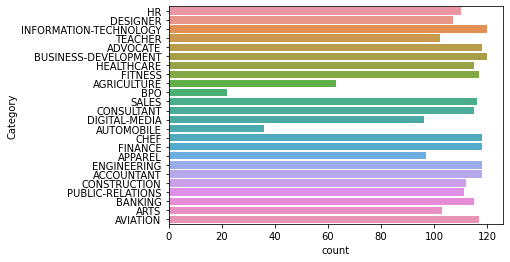

In [20]:

ax = sns.countplot(y=df['Category'], data=pd.read_csv('C:/Users/CEMRE/Desktop/Resume.csv'))

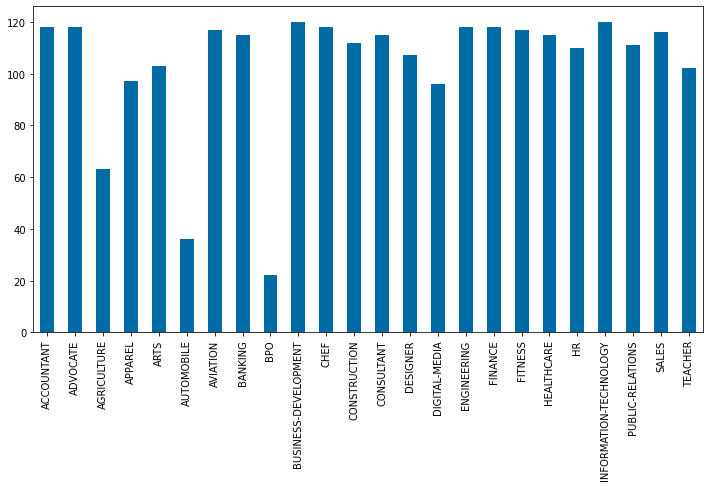

In [21]:
df['Category'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6))
plt.show()

In [22]:

def utils_preprocess_text(text, flg_stemm=False, flg_lemm=True, lst_stopwords=None):
  ## clean (convert to lowercase and remove puncuations and characters and then strip)
  text = re.sub(r'[^\w\s]', '', str(text).lower().strip())

  ## Tokenize (convert from string to list)
  lst_text = text.split()

  ## remove stopwords
  if lst_stopwords is not None:
    lst_text = [word for word in lst_text if word not in lst_stopwords]

  ## Stemming (remove -ing, -ly, ...)
  if flg_stemm == True:
    ps = nltk.stem.porter.PorterStemmer()
    lst_text = [ps.stem(word) for word in lst_text] 

  ## Lemmatisation(convert the word into root word)
  if flg_lemm == True:
    lem = nltk.stem.wordnet.WordNetLemmatizer()
    lst_text = [lem.lemmatize(word) for word in lst_text]

  ## back to string from list
  text = " ".join(lst_text)
  return text

In [23]:
nltk.download('stopwords')
nltk.download('wordnet') 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\CEMRE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\CEMRE\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [24]:
lst_stopwords = nltk.corpus.stopwords.words("english")
lst_stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [25]:
df = df.rename(columns={"Category":"y", "Resume_str":"text"})
df.sample(5)

,text,y
1571,DIRECTOR OF FINANCE Accomplis...,FINANCE
2075,DIRECTOR OF PUBLIC RELATIONS / ASSOCI...,PUBLIC-RELATIONS
204,BRANCH MANAGER/FLORAL DESIGNER ...,DESIGNER
1280,DIGITAL CLIENT LEAD Exper...,DIGITAL-MEDIA
571,BUSINESS DEVELOPMENT REPRESENTATIVE ...,BUSINESS-DEVELOPMENT


In [26]:
df["text_clean"] = df["text"].apply(lambda x: utils_preprocess_text(x, flg_stemm=False, flg_lemm=True, lst_stopwords=lst_stopwords))

df.head()

,text,y,text_clean
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR,hr administratormarketing associate hr adminis...
1,"HR SPECIALIST, US HR OPERATIONS ...",HR,hr specialist u hr operation summary versatile...
2,HR DIRECTOR Summary Over 2...,HR,hr director summary 20 year experience recruit...
3,HR SPECIALIST Summary Dedica...,HR,hr specialist summary dedicated driven dynamic...
4,HR MANAGER Skill Highlights ...,HR,hr manager skill highlight hr skill hr departm...


In [27]:
from sklearn import metrics, feature_extraction, feature_selection, model_selection, naive_bayes, pipeline, manifold, preprocessing

In [28]:
df_train, df_test = model_selection.train_test_split(df, test_size=0.3)

## get target
y_train = df_train["y"].values
y_test = df_test["y"].values

In [29]:
type(y_test)

numpy.ndarray

In [30]:
## BOW 
## Count (classic BoW)
vectorizer = feature_extraction.text.CountVectorizer(max_features=10000, ngram_range=(1,2))

## TF-IDF (advanced variant of BoW)
vectorizer = feature_extraction.text.TfidfVectorizer(max_features=10000, ngram_range=(1,2))

In [31]:
corpus = df_train["text_clean"]

vectorizer.fit(corpus)
X_train = vectorizer.transform(corpus)
dic_vocabulary = vectorizer.vocabulary_

In [32]:
X_train.shape

(1738, 10000)

Text(0.5, 1.0, 'Sparse Matrix Sample')

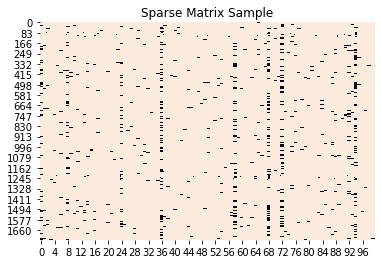

In [33]:
sns.heatmap(X_train.todense()[:, np.random.randint(0, X_train.shape[1], 100)]==0, vmin=0, vmax=1, cbar=False).set_title('Sparse Matrix Sample')

In [34]:
y = df_train["y"]
X_names = vectorizer.get_feature_names()
p_value_limit = 0.95
df_features = pd.DataFrame()
for cat in np.unique(y):
    chi, p = chi2(X_train, y==cat)
    df_features = df_features.append(pd.DataFrame(
                   {"feature":X_names, "score":1-p, "y":cat}))
    df_features = df_features.sort_values(["y","score"], 
                    ascending=[True,False])
    df_features = df_features[df_features["score"]>p_value_limit]
X_names = df_features["feature"].unique().tolist()

In [35]:
for cat in np.unique(y):
   print("# {}:".format(cat))
   print("  . selected features:",
         len(df_features[df_features["y"]==cat]))
   print("  . top features:", ",".join(
df_features[df_features["y"]==cat]["feature"].values[:10]))
   print(" ")

# ACCOUNTANT:
  . selected features: 163
  . top features: accountant,accounting,ledger,reconciliation,general ledger,journal entry,tax,financial statement,fixed asset,statement
 
# ADVOCATE:
  . selected features: 43
  . top features: advocate,domestic violence,advocate summary,victim,service advocate,violence,patient advocate,patient,shelter,assault
 
# AGRICULTURE:
  . selected features: 35
  . top features: agriculture,agricultural,natural resource,formulation,molecular,conservation,assay,biological,dna,farmer
 
# APPAREL:
  . selected features: 37
  . top features: apparel,merchandising,store,fashion,assortment,garment,stylist,fabric,buyer,factory
 
# ARTS:
  . selected features: 38
  . top features: art teacher,art,language art,dance,ballet,student,performing art,art education,teacher,grade
 
# AUTOMOBILE:
  . selected features: 27
  . top features: automobile,tibco,datastage,mdm,liability claim,claim,bike,etl,cim,tibco cim
 
# AVIATION:
  . selected features: 78
  . top features

In [36]:
vectorizer = feature_extraction.text.TfidfVectorizer(vocabulary=X_names)
vectorizer.fit(corpus)
X_train = vectorizer.transform(corpus)
dic_vocabulary = vectorizer.vocabulary_

In [37]:
classifier = naive_bayes.MultinomialNB()

In [38]:
## pipeline
model = pipeline.Pipeline([("vectorizer", vectorizer),  
                           ("classifier", classifier)])
## train classifier
model["classifier"].fit(X_train, y_train)
## test
X_test = df_test["text_clean"].values
predicted = model.predict(X_test)
predicted_prob = model.predict_proba(X_test)

In [40]:
## select observation
i = 0
txt_instance = df_test["text"].iloc[i]
## check true value and predicted value
print("True:", y_test[i], "--> Pred:", predicted[i], "| Prob:", round(np.max(predicted_prob[i]),2))
## show explanation
explainer = lime_text.LimeTextExplainer(class_names=
             np.unique(y_train))
explained = explainer.explain_instance(txt_instance, 
             model.predict_proba, num_features=3)
explained.show_in_notebook(text=txt_instance, predict_proba=False)

True: ARTS --> Pred: TEACHER | Prob: 0.82


In [41]:
#svm
from sklearn.svm import SVC
svc_model = SVC(gamma='auto',kernel="linear") #kernel'idoğrusal yani lineer olarak ayarladık
svc_model.fit(X_train, y_train)

SVC(gamma='auto', kernel='linear')

In [ ]:
#from sklearn import metrics

In [43]:
# Eğitim modelini tahmin etme 
y_predict = svc_model.predict(X_train)

In [44]:
y_predict

array(['FITNESS', 'FITNESS', 'CONSULTANT', ..., 'SALES', 'ADVOCATE',
       'DESIGNER'], dtype=object)

In [46]:
# confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_train, y_predict)

In [47]:
cm

array([[80,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  1,  0,  0,  0,  0,
         2,  0,  0,  0,  0,  0,  1,  0],
       [ 0, 60,  0,  0,  1,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  2,  6,  2,  1,  0,  7,  0],
       [ 1,  1, 32,  0,  1,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  1,
         2,  0,  0,  0,  3,  1,  1,  3],
       [ 1,  0,  1, 48,  0,  1,  0,  2,  0,  1,  0,  0,  2,  4,  1,  2,
         0,  0,  0,  1,  2,  0,  4,  0],
       [ 0,  2,  1,  1, 48,  0,  0,  1,  0,  0,  1,  0,  0,  1,  1,  0,
         0,  0,  2,  2,  1,  2,  3,  8],
       [ 0,  2,  0,  0,  0, 16,  2,  0,  0,  1,  0,  0,  0,  0,  0,  2,
         0,  0,  1,  0,  1,  0,  2,  0],
       [ 0,  1,  0,  0,  0,  0, 68,  0,  0,  1,  0,  0,  1,  0,  0,  2,
         1,  0,  1,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 73,  0,  2,  0,  0,  1,  0,  0,  0,
         1,  0,  0,  1,  2,  0,  0,  0],
       [ 0,  1,  0,  1,  0,  0,  0,  2,  6,  0,  1,  0,  0,  0,  0,  0,
         0,  0,  0,  1, 

<AxesSubplot:>

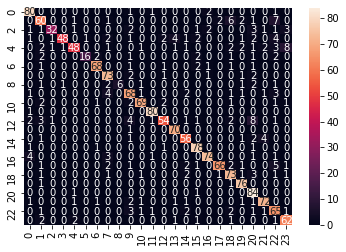

In [48]:
sns.heatmap(cm, annot= True)


In [49]:
print(classification_report(y_train, y_predict))

                        precision    recall  f1-score   support

            ACCOUNTANT       0.87      0.94      0.90        85
              ADVOCATE       0.76      0.75      0.75        80
           AGRICULTURE       0.91      0.67      0.77        48
               APPAREL       0.96      0.69      0.80        70
                  ARTS       0.89      0.65      0.75        74
            AUTOMOBILE       0.94      0.59      0.73        27
              AVIATION       0.93      0.89      0.91        76
               BANKING       0.82      0.91      0.86        80
                   BPO       1.00      0.40      0.57        15
  BUSINESS-DEVELOPMENT       0.76      0.83      0.79        82
                  CHEF       0.92      0.87      0.90        79
          CONSTRUCTION       0.95      0.99      0.97        81
            CONSULTANT       0.89      0.69      0.78        78
              DESIGNER       0.91      0.99      0.95        71
         DIGITAL-MEDIA       0.82      

In [73]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train,y_predict) #roc auc skorunu gerçek değerler ve tahmin edilen değerler için bulundu

ValueError: could not convert string to float: 'FITNESS'

In [54]:
accuracy_score(y_train, y_predict)

0.8504027617951668

In [75]:
from sklearn.model_selection import cross_val_score  #10 katlı cross validation
cross_val_score(svc_model, X_test, y_train, cv=10).mean() #10 katlı cross validation ortalaması

ValueError: Found input variables with inconsistent numbers of samples: [746, 1738]

Model Tuning

In [59]:
svm=SVC()

In [60]:
svm_params={"C":np.arange(1,10), "kernel":["linear","rbf"]} #hiperparametre değerleri
#hangi kernel değeri ve hangi paramtre ddeğeri bu model için uygun yukarıda verdiğimiz alternatiflerden?

In [61]:
from sklearn.model_selection import GridSearchCV #GridSearchCV dahil edildi
svm_cv_model=GridSearchCV(svm,svm_params, cv=10,n_jobs=-1, verbose=2).fit(X_train,y_train) 
#10  katlı cross validation yapılacak ve en ugun parametre değeri belirlemesi GridSearchCV ile elde edilec

Fitting 10 folds for each of 18 candidates, totalling 180 fits


In [ ]:
#180 fits(180 tane fit etme işlemi gerçeklştirilecek bu bilgiyi verbose argümanı ile elde ettik)

In [74]:
svm_cv_model.best_score_ #en iyi skore değeri 
#modelin en iyi skor değeri sonucu en iyi ceza parametresi (C) olarak 2 değeri ile ve kernel'ıda rbf olarak seçti

0.6783469536907847

final model

In [65]:
#oluşturduğumuz final modeli üzerinden test hatasına erişeceğiz
svm_tuned=SVC(C=2, kernel="rbf").fit(X_train,y_train) #tuned edilmiş model

In [67]:
y_pred=svm_tuned.predict(X_train) 

In [69]:
accuracy_score(y_train,y_pred)

0.9890678941311852

In [20]:
sentences_training = [doc for doc in df.iloc[:,0]]
classification_training = [doc for doc in df.iloc[:,1]]

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(analyzer='word', lowercase = True)

In [22]:
sen_train_vector = vectorizer.fit_transform(sentences_training)

In [23]:
print(sen_train_vector.toarray())

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.03646868 0.         0.         ... 0.         0.         0.        ]]
